In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Разведочный анализ данных

In [4]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.shape

(398, 9)

Датасет содержит 9 признаков и 398 наблюдений

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


В наборе содержатся следующие типы данных:
1) Категориальный - car name (название автомобиля), horsepower
2) Количественный непрерывный - mpg, displacement, acceleration
3) Количественный дискретный - cylinders, weight,model year, origin

В наборе данных признак horsepower относится к строковому типу, когда в таблице он представлен целым числом. Это может быть связано с наличием пропусков или текстовых значений, таких как "?" или "unknown", что требует дальнейшей обработки.

Проверим датасет на наличие дубликатов и пропусков

In [7]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [8]:
df.duplicated().sum()


np.int64(0)

Пропуски и дубликаты отсутствуют, но нужно проверить horsepower на предмет аномальных значений

In [9]:
df['horsepower'].unique()
#обнаружено аномальное значение '?' Посчитаем кол-во таких значений и заменим их на среднее значение по признаку

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
df['horsepower'] = df['horsepower'].replace('?', np.nan) #заменяем ? на Nan

df['horsepower'] = df['horsepower'].astype(float) # преобразуем в числовой тип int

print("Количество пропусков в horsepower:", df['horsepower'].isna().sum()) #проверяем на пропуски

Количество пропусков в horsepower: 6


In [23]:
#Обнаружено 6 пропусков по признаку horsepower, заменим их на средние значения
mean_horsepower = round(df['horsepower'].mean())
df['horsepower'].fillna(mean_horsepower, inplace=True)
print("Количество пропусков после замены:", df['horsepower'].isna().sum())

Количество пропусков после замены: 0


<ipython-input-23-859de0ef9cd3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(mean_horsepower, inplace=True)


In [24]:
#Преобразуем в int
df['horsepower'] =  df['horsepower'].astype(int)
df['horsepower'].dtype

dtype('int64')

Шкала измерений:

Номинальная шкала: для категориальных признаков: car name, origin, model year

Непрерывная шкала: mpg, displacement, horsepower,weight, acceleration

Дискретная шкала: cylinders

# Визуализация данных

Построим гистограммы для количественных переменных

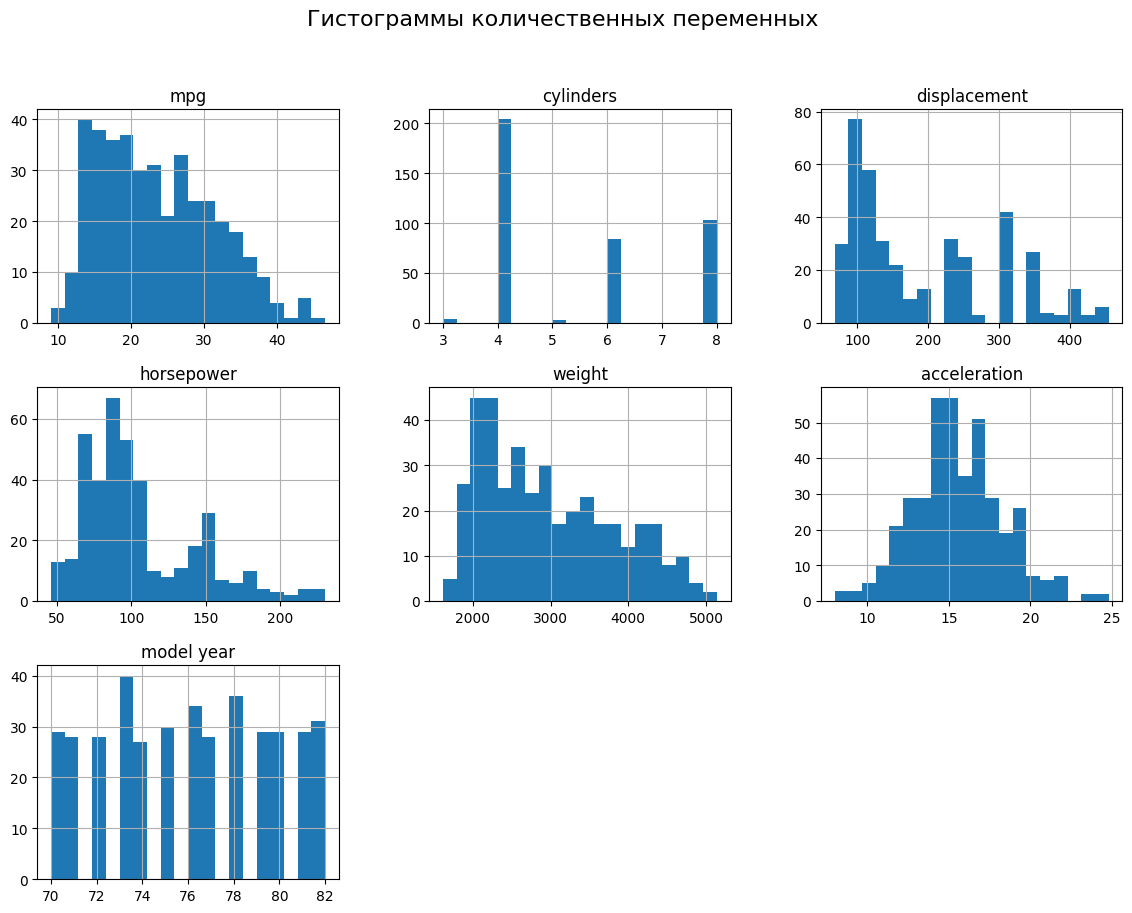

In [26]:
df.hist(column = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'], bins = 20, figsize= (14,10))
plt.suptitle('Гистограммы количественных переменных', fontsize = 16)
plt.show()


Построим боксплоты и диаграммы рассеивания для рассмотрения взаимосвязи переменной mpg с переменными, которые гипотетически могут иметь с ней корреляцию.

Боксплоты для сравнения mpg с категориальными признаками

Диаграммы рассеивания для сравнения двух количественных признаков

<ipython-input-28-519324da8dfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="origin", y="mpg", data=df, palette="Set2")


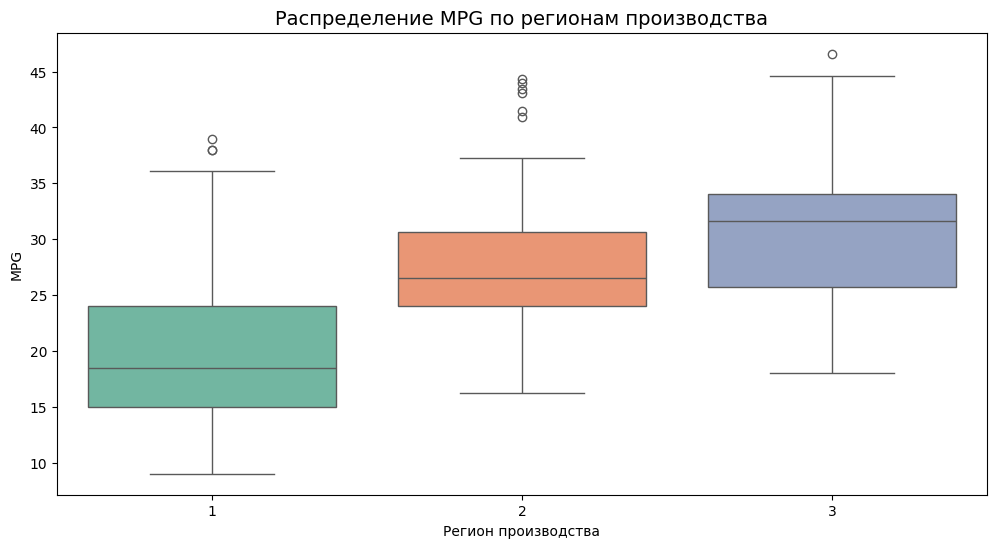

<ipython-input-28-519324da8dfd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cylinders', y='mpg', data=df, palette= 'Set2')


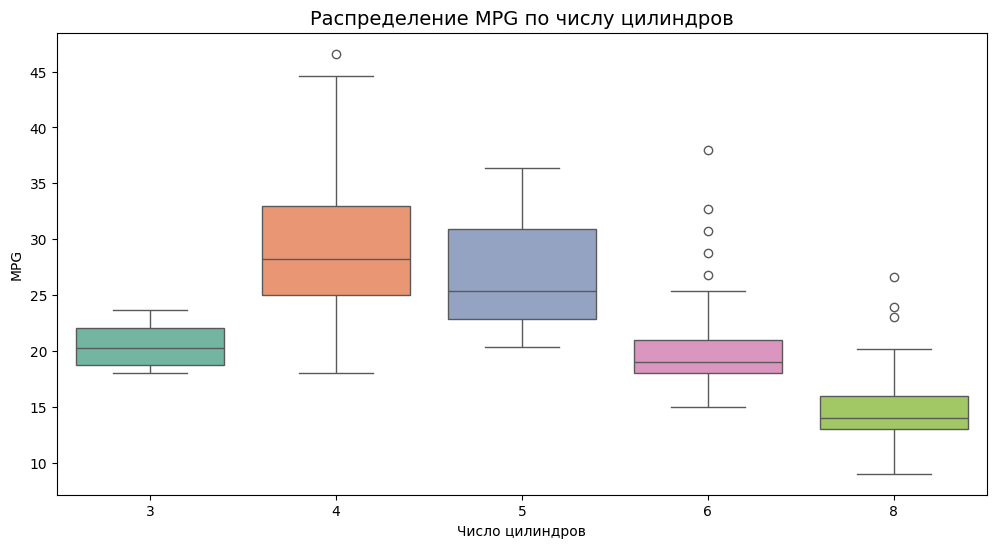

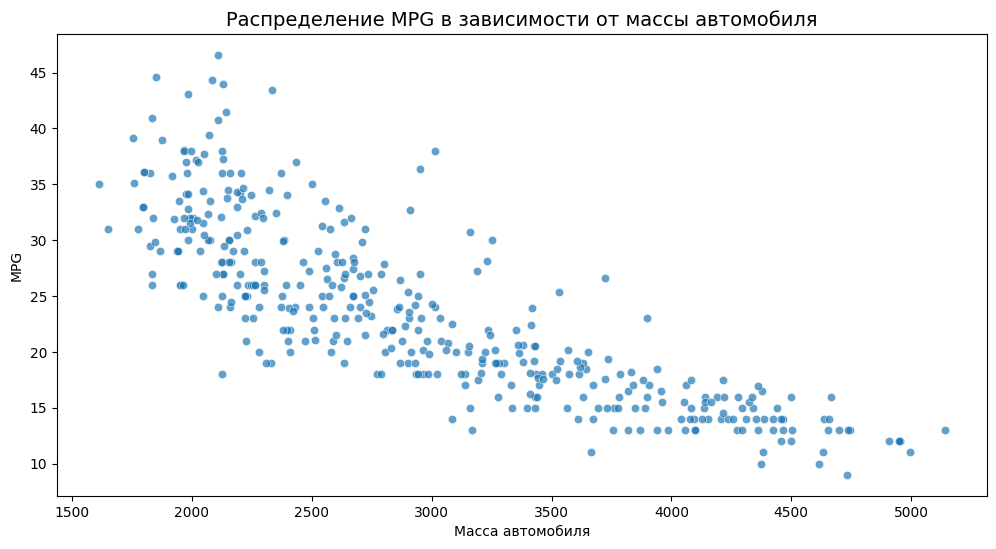

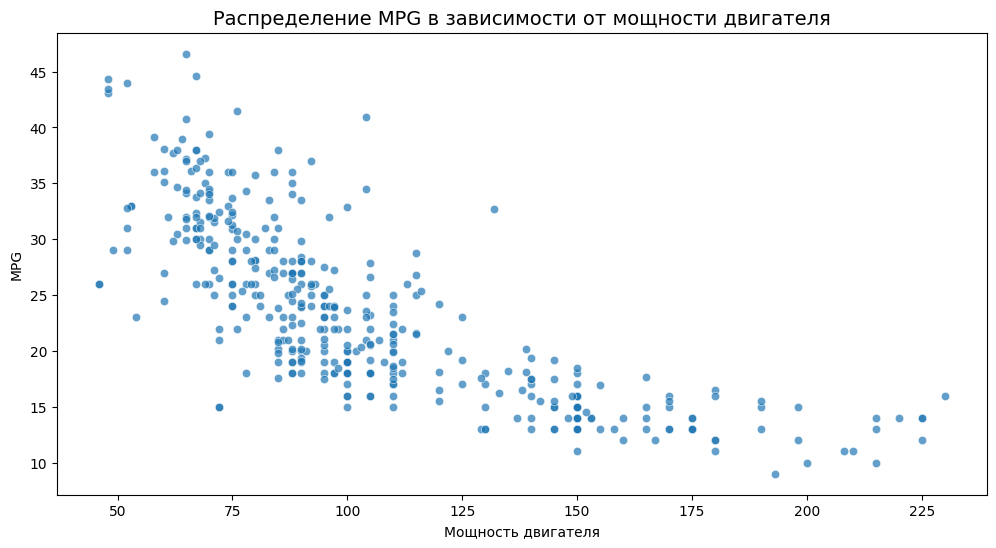

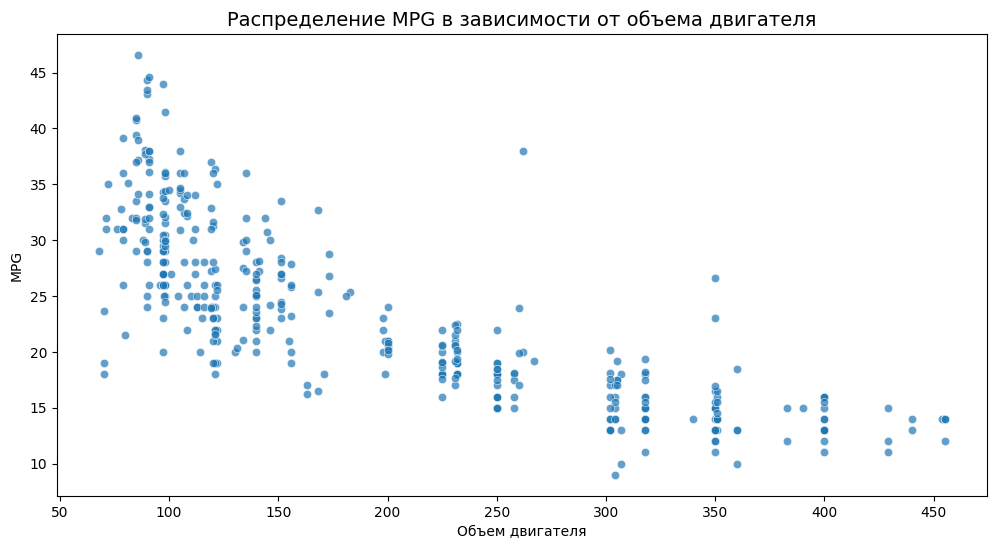

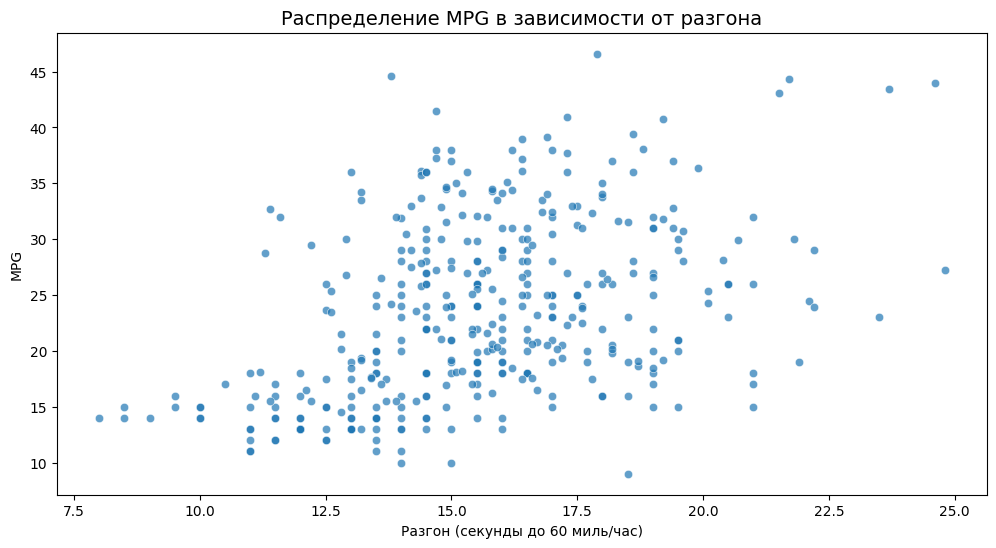

In [28]:
#Боксплот для mpg и origin
plt.figure(figsize=(12, 6))
sns.boxplot(x="origin", y="mpg", data=df, palette="Set2")
plt.title("Распределение MPG по регионам производства", fontsize=14)
plt.xlabel("Регион производства")
plt.ylabel("MPG")
plt.show()

#Боксплот для mpg и cylinders
plt.figure(figsize=(12,6))
sns.boxplot(x='cylinders', y='mpg', data=df, palette= 'Set2')
plt.title('Распределение MPG по числу цилиндров', fontsize = 14)
plt.xlabel('Число цилиндров')
plt.ylabel('MPG')
plt.show

#Диаграмма рассеивания для mpg и weight
plt.figure(figsize=(12, 6))
sns.scatterplot(x="weight", y="mpg", data=df, alpha=0.7)
plt.title("Распределение MPG в зависимости от массы автомобиля", fontsize=14)
plt.xlabel("Масса автомобиля")
plt.ylabel("MPG")
plt.show()

#Диаграмма рассеивания для mpg и horsepower
plt.figure(figsize=(12, 6))
sns.scatterplot(x="horsepower", y="mpg", data=df, alpha=0.7)
plt.title("Распределение MPG в зависимости от мощности двигателя", fontsize=14)
plt.xlabel("Мощность двигателя")
plt.ylabel("MPG")
plt.show()

#Диаграмма рассеивания для mpg и displacement
plt.figure(figsize=(12, 6))
sns.scatterplot(x="displacement", y="mpg", data=df, alpha=0.7)
plt.title("Распределение MPG в зависимости от объема двигателя", fontsize=14)
plt.xlabel("Объем двигателя")
plt.ylabel("MPG")
plt.show()

#Диаграмма рассеивания для mpg и acceleration
plt.figure(figsize=(12, 6))
sns.scatterplot(x="acceleration", y="mpg", data=df, alpha=0.7)
plt.title("Распределение MPG в зависимости от разгона", fontsize=14)
plt.xlabel("Разгон (секунды до 60 миль/час)")
plt.ylabel("MPG")
plt.show()


**Согласно полученным результатам визуализации данных, можно сделать следующие выводы для построения модели регрессии:**     

 1) MPG распределен ассиметрично влево с пиком на 20-30, что свидетельствует о том, что большая часть автомобилей имеет средний расход топлива.

 2) Переменные acceleration, model year имеют близкое к нормальному распределение, поэтому они подойдут для линейных преобразований

 3) Переменные displacement, weight имеют правую ассиметрию и выбросы что потребует их нормализации или лог-преобразований

 3) Боксплоты MPG и Cylinders показывают четкую обратную зависимость: чем больше цилиндров, тем меньше расход топлива и наоборот. Поэтому кол-во цилиндров- важный предиктор регрессионной модели

 4) Наибольший расход имеют автомобили из региона 3 (ЮВ Азия) а 1 (США) наименьший

 5) Во всех диаграммах рассеивания, кроме последней присутствует четкая отрицательная корреляция. Но эти переменные могут быть нелинейны что потребует возможного использования нелинейных моделей или линеаризации



# Оценка взаимосвязи факторов

Проанализируем связи количественных факторов с категориальными. Для этого сформируем и проверим следующую нулевую гипотезу:

H0: Нет статистически значимой разницы в расходе топлива (mpg) между автомобилями, произведенными в США и Европе.


**Статистический метод- T-тест (t-критерий Стьюдента)**

Обоснование выбора статистического критерия:

Мы анализируем различия в средних значениях расхода топлива (mpg) между двумя группами: автомобилями из США и Европы. Поскольку переменная mpg является количественной и имеет примерно нормальное распределение, а переменная origin (регион) категориальна и включает две группы (США и Европа), для сравнения средних значений между этими независимыми группами используется t-тест для независимых выборок.

<ipython-input-45-a017a66542a1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin', y='mpg', data=df, palette="Set2")


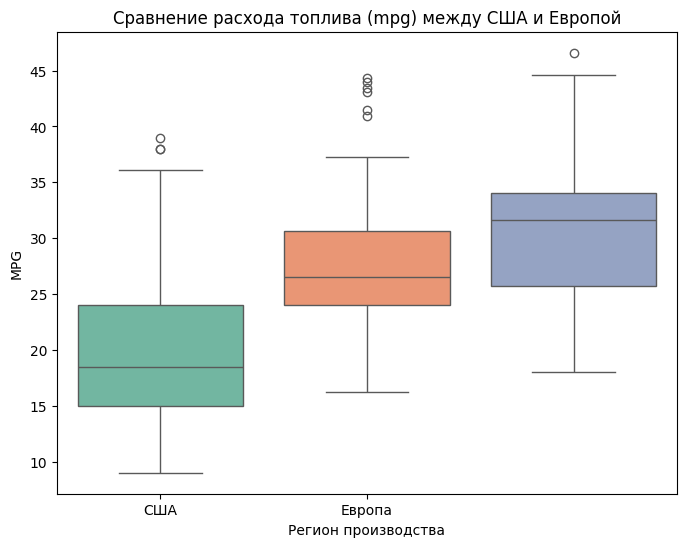

T-статистика: -8.914687150324422
P-значение: 3.94517347398542e-17
Есть статистически значимая разница в расходе топлива между США и Европой.


In [45]:

# Выберем две категории: США (1) и Европа (2)
us_cars = df[df['origin'] == 1]['mpg']
europe_cars = df[df['origin'] == 2]['mpg']

# Выполненим t-тест
t_stat, p_value = stats.ttest_ind(us_cars, europe_cars)

# Визуализируем данные с помощью боксплота
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df, palette="Set2")
plt.title('Сравнение расхода топлива (mpg) между США и Европой')
plt.xlabel('Регион производства')
plt.ylabel('MPG')
plt.xticks([0, 1], ['США', 'Европа'])
plt.show()

# Выведем результаты теста
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")
if p_value < 0.05:
    print("Есть статистически значимая разница в расходе топлива между США и Европой.")
else:
    print("Нет статистически значимой разницы в расходе топлива между США и Европой.")


Поскольку p-значение значительно меньше 0.05, **мы отвергаем нулевую гипотезу**, которая утверждает, что нет разницы в расходе топлива (mpg) между автомобилями из США и Европы. Это означает, что **существует статистически значимая разница в расходе топлива между автомобилями, произведенными в США и Европе.**

Таким образом, можно заключить, что расход топлива у автомобилей из США и Европы существенно различается.

Корреляционный анализ Пирсона для количественных переменных

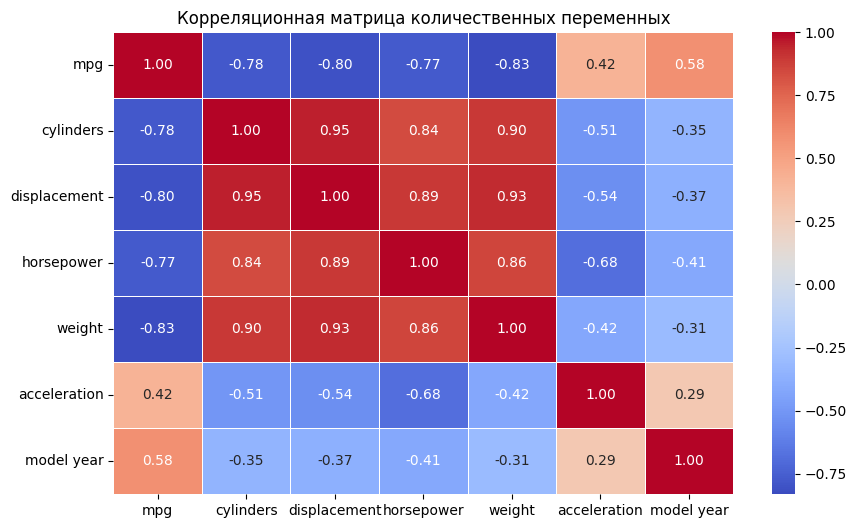

In [47]:
correlation_matrix = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица количественных переменных')
plt.show()

На основании полученных результатов мы видим присутствие отрицательной корреляции между mpg и такими переменными как weight, horsepower, displacement, cylinders. У целевой переменной присутствует слабо выраженная положительная корреляция с acceleration и model_year

Таблица сопряженности для двух категориальных факторов origin (страна производитель) и cylinders(кол-во цилиндров)

Статистический метод- хи-квадрат

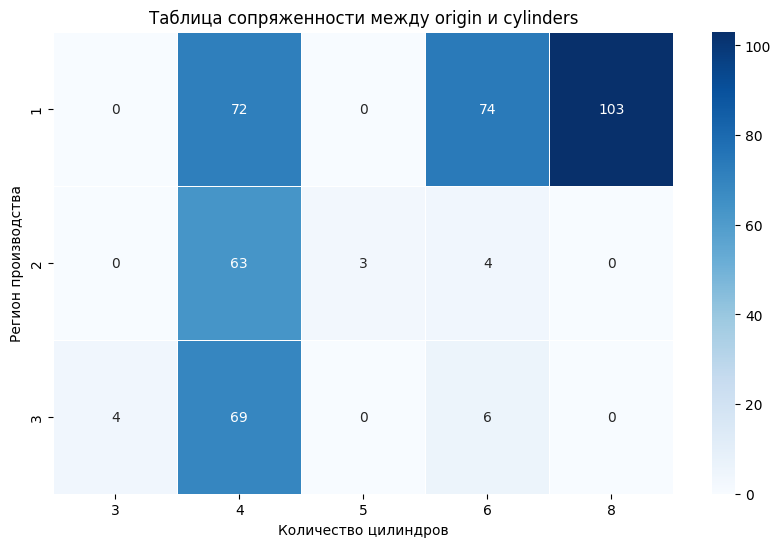

Хи-квадрат статистика: 180.10177141976712
P-значение: 9.800693325588576e-35
Есть статистически значимая зависимость между region и cylinders.


In [48]:
# Таблица сопряженности между origin и cylinders
contingency_table = pd.crosstab(df['origin'], df['cylinders'])

# Визуализация таблицы сопряженности
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Таблица сопряженности между origin и cylinders')
plt.xlabel('Количество цилиндров')
plt.ylabel('Регион производства')
plt.show()

# Хи-квадрат тест
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Вывод результатов
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"P-значение: {p_val}")
if p_val < 0.05:
    print("Есть статистически значимая зависимость между region и cylinders.")
else:
    print("Нет статистически значимой зависимости между region и cylinders.")


Хи-квадрат тест показал статистически значимую зависимость между регионом производства и числом цилиндров. Например, автомобили, произведенные в США, часто имеют 6 или 8 цилиндров, в то время как в Европе преобладают автомобили с 4 цилиндрами.

# Построение регрессионной модели

Для начала выполним все необходимые преобразования, упомянутые в вышеперечисленных выводах

In [49]:
# Преобразуем переменные с правой ассиметрией
df['log_displacement'] = np.log1p(df['displacement'])
df['log_weight'] = np.log1p(df['weight'])

# One-Hot Encoding для категориальной переменной origin
df = pd.get_dummies(df, columns=['origin'], drop_first=True)


In [54]:
#уберем выбросы

# Определяем функцию для удаления выбросов на основе IQR
def remove_outliers(df, columns):
    """
    Удаляет выбросы из указанных столбцов на основе межквартильного размаха (IQR).

    Значения за пределами 1.5 IQR от квартилей считаются выбросами и удаляются.

    Параметры:
    df (pandas.DataFrame): Данные для очистки.
    columns (list): Столбцы, в которых удаляются выбросы.

    Возвращает:
    pandas.DataFrame: DataFrame без выбросов.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Список количественных переменных
quantitative_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# Убираем выбросы для количественных переменных
df_cleaned = remove_outliers(df, quantitative_cols)

# Проверим размерность данных после удаления выбросов
print(f"Размер данных до удаления выбросов: {df.shape}")
print(f"Размер данных после удаления выбросов: {df_cleaned.shape}")



Размер данных до удаления выбросов: (398, 12)
Размер данных после удаления выбросов: (378, 12)


In [55]:
#разделим данные на обучающую и тестовую выборку
X = df[['cylinders', 'acceleration', 'model year', 'log_displacement', 'log_weight', 'horsepower', 'log_displacement', 'log_weight', 'origin_2', 'origin_3']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Проведем стандартизацию признаков
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Построим линейную регрессию
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [59]:
#Прогноз и оценка качества линейной модели
y_pred_linear = linear_model.predict(X_test_scaled)

In [60]:
#Метрики качества линейной модели
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [61]:
#Построим нелинейную модель с линеаризацией
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

nonlinear_model = LinearRegression()
nonlinear_model.fit(X_train_poly, y_train)

LinearRegression()

In [62]:
#Прогноз и оценка качества нелинейной модели
y_pred_nonlinear = nonlinear_model.predict(X_test_poly)

In [63]:
# Метрики качества нелинейной модели
mse_nonlinear = mean_squared_error(y_test, y_pred_nonlinear)
rmse_nonlinear = np.sqrt(mse_nonlinear)
mae_nonlinear = mean_absolute_error(y_test, y_pred_nonlinear)
r2_nonlinear = r2_score(y_test, y_pred_nonlinear)

In [64]:
# Сравним результаты
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Nonlinear (Polynomial) Regression'],
    'MSE': [mse_linear, mse_nonlinear],
    'RMSE': [rmse_linear, rmse_nonlinear],
    'MAE': [mae_linear, mae_nonlinear],
    'R2': [r2_linear, r2_nonlinear]
})

print(results)

                               Model      MSE      RMSE       MAE        R2
0                  Linear Regression  7.59924  2.756672  2.114156  0.858662
1  Nonlinear (Polynomial) Regression  5.18944  2.278034  1.729432  0.903482


In [65]:
#Выведем прогнозы
print("Прогнозы для тестовой выборки (линейная модель):", y_pred_linear[:5])
print("Прогнозы для тестовой выборки (нелинейная модель):", y_pred_nonlinear[:5])

Прогнозы для тестовой выборки (линейная модель): [33.40827505 29.43400426 20.10805458 17.19456339 13.26889559]
Прогнозы для тестовой выборки (нелинейная модель): [32.56546548 29.84869226 20.87986513 15.53919707 13.58688686]


# Ключевые выводы: какая модель показала лучшие результаты

Нелинейная модель (полиномиальная) показала лучшие результаты по всем метрикам:

1) MSE, RMSE, и MAE для нелинейной модели меньше, что свидетельствует о меньшей ошибке на тестовой выборке.


2) R² для нелинейной модели выше (0.90 против 0.86 у линейной модели), что говорит о том, что у нелинейной модели лучше объяснение вариативности целевой переменной mpg

Таким образом, **нелинейная модель дает лучшие результаты** и более точно предсказывает расход топлива в сравнении с линейной моделью. Это подтверждает, что взаимосвязь между переменными может быть более сложной, чем линейной, что оправдывает использование полиномиальной регрессии.

Однако **обе модели имеют высокое качество предсказаний**, так как у обех R² выше 0.85.